In [11]:
#LOAD DATA PER TAHUN
import pandas as pd

df_2019 = pd.read_excel('D:/My/Data Analyst/Pangan_jateng_analysis/data/raw/pangan_2019.xlsx')
df_2020 = pd.read_excel('D:/My/Data Analyst/Pangan_jateng_analysis/data/raw/pangan_2020.xlsx')
df_2021 = pd.read_excel('D:/My/Data Analyst/Pangan_jateng_analysis/data/raw/pangan_2021.xlsx')
df_2022 = pd.read_excel('D:/My/Data Analyst/Pangan_jateng_analysis/data/raw/pangan_2022.xlsx')
df_2023 = pd.read_excel('D:/My/Data Analyst/Pangan_jateng_analysis/data/raw/pangan_2023.xlsx')

In [12]:
#STANDARISASI NAMA KOLOM
for df in [df_2019, df_2020, df_2021, df_2022, df_2023]:
    df.columns = (
        df.columns
        .str.lower()
        .str.strip()
        .str.replace(' ', '_')
    )


In [13]:
#GABUNG DATA PER TAHUN MENJADI 1 DATAFRAME
df_all = pd.concat(
    [df_2019, df_2020, df_2021, df_2022, df_2023],
    axis=0,
    ignore_index=True
)


In [ ]:
#CEK DATAFRAME HASIL GABUNGAN
df_all.shape
df_all['tahun_data'].value_counts()
df_all.head()
df_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun_data        476 non-null    int64 
 1   komoditas_pangan  476 non-null    object
 2   bulan_data        476 non-null    object
 3   ketersdiaan_data  476 non-null    int64 
 4   kebutuhan_data    476 non-null    int64 
 5   deviasi_data      476 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 22.4+ KB


In [16]:
#SAVE DATAFRAME HASIL GABUNGAN
df_all.to_csv(
    'D:\My\Data Analyst\Pangan_jateng_analysis\data\processed/pangan_jateng_2019_2023.csv',
    index=False
)

###  ANALISIS PROSES   ###

In [ ]:
#LOAD DATA YANG SUDAH DIPROSES
df = pd.read_csv(
    r'D:\My\Data Analyst\Pangan_jateng_analysis\data\processed\pangan_jateng_2019_2023.csv'
)

df.head()
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun_data        476 non-null    int64 
 1   komoditas_pangan  476 non-null    object
 2   bulan_data        476 non-null    object
 3   ketersdiaan_data  476 non-null    int64 
 4   kebutuhan_data    476 non-null    int64 
 5   deviasi_data      476 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 22.4+ KB


(476, 6)

In [ ]:
#RENAME KOLOM UNTUK MEMUDAHKAN ANALISIS
df = df.rename(columns={
    'tahun_data': 'tahun',
    'bulan_data': 'bulan',
    'komoditas_pangan': 'komoditas',
    'ketersdiaan_data': 'ketersediaan',
    'kebutuhan_data': 'kebutuhan',
    'deviasi_data': 'deviasi'
})


In [31]:
df.columns


Index(['tahun', 'komoditas', 'bulan', 'ketersediaan', 'kebutuhan', 'deviasi'], dtype='object')

In [ ]:
#PREPROCESSING/CLEANING DATA KOMODITAS
df['komoditas'] = (
    df['komoditas']
    .astype(str)
    .str.strip()
    .str.lower()
)


In [ ]:
#CEK NILAI UNIK KOMODITAS SETELAH PREPROCESSING
df['komoditas'].value_counts()


komoditas
bawang merah            38
kedelai                 38
telur                   38
jagung                  38
beras                   36
minyak goreng           36
daging ayam             36
bawang putih            36
cabai rawit             26
gula konsumsi           24
daging sapi             24
cabai besar             24
daging sapi / kerbau    12
daging total            12
cabe rawit              12
cabe besar              12
gula pasir              12
garam                    2
cabai merah              2
ikan                     2
susu                     2
daging                   2
gula                     2
ubi jalar                2
ubi kayu                 2
k. hijau                 2
k. tanah                 2
padi                     2
Name: count, dtype: int64

In [ ]:
#CONVERT KOLOM KETERSEDIAAN, KEBUTUHAN, DAN DEVIASI MENJADI NUMERIK
num_cols = ['ketersediaan', 'kebutuhan', 'deviasi']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[num_cols].isna().sum()


ketersediaan    0
kebutuhan       0
deviasi         0
dtype: int64

In [37]:
df.describe()


,tahun,ketersediaan,kebutuhan,deviasi
count,476.000000,4.760000e+02,4.760000e+02,4.760000e+02
mean,2021.857143,2.447649e+05,8.371724e+04,1.611392e+05
std,1.024218,6.259410e+05,2.232262e+05,4.940110e+05
min,2019.000000,-9.321000e+04,8.600000e+01,-2.884350e+05
25%,2021.000000,1.810500e+04,1.122100e+04,-7.232500e+03
50%,2022.000000,3.353300e+04,2.221500e+04,1.283450e+04
75%,2023.000000,1.758330e+05,7.343700e+04,6.990375e+04
max,2023.000000,5.736886e+06,3.197547e+06,3.436068e+06


In [ ]:
#TAMBAHKAN KOLOM SURPLUS/DEFISIT DAN RASIO PANGAN
df['surplus_defisit'] = df['ketersediaan'] - df['kebutuhan']
df['rasio_pangan'] = df['ketersediaan'] / df['kebutuhan']


In [39]:
#AGGREGASI DATA PER TAHUN DAN KOMODITAS
df_tahun = df.groupby(
    ['tahun', 'komoditas']
).agg({
    'ketersediaan': 'sum',
    'kebutuhan': 'sum',
    'surplus_defisit': 'sum'
}).reset_index()


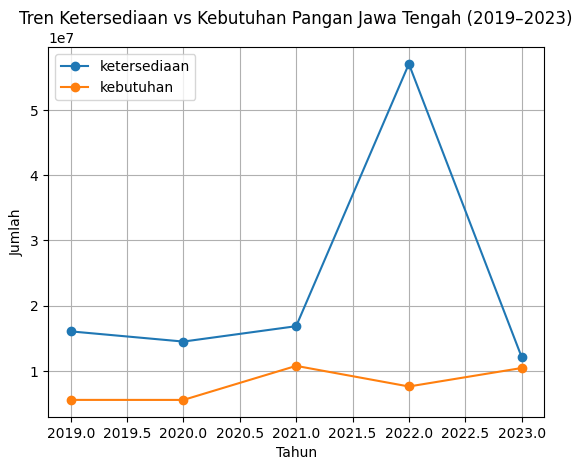

In [ ]:
#VISUALISASI TREN KETERSEDIAAN DAN KEBUTUHAN PANGAN JAWA TENGAH (2019–2023)
import matplotlib.pyplot as plt

trend = df_tahun.groupby('tahun')[['ketersediaan','kebutuhan']].sum()

trend.plot(marker='o')
plt.title('Tren Ketersediaan vs Kebutuhan Pangan Jawa Tengah (2019–2023)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.grid(True)
plt.show()


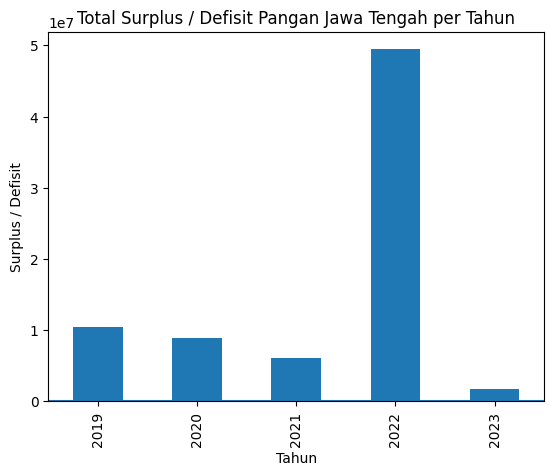

In [41]:
#VISUALISASI SURPLUS / DEFISIT PANGAN JAWA TENGAH PER TAHUN
surplus_tahun = df_tahun.groupby('tahun')['surplus_defisit'].sum()

surplus_tahun.plot(kind='bar')
plt.title('Total Surplus / Defisit Pangan Jawa Tengah per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Surplus / Defisit')
plt.axhline(0)
plt.show()


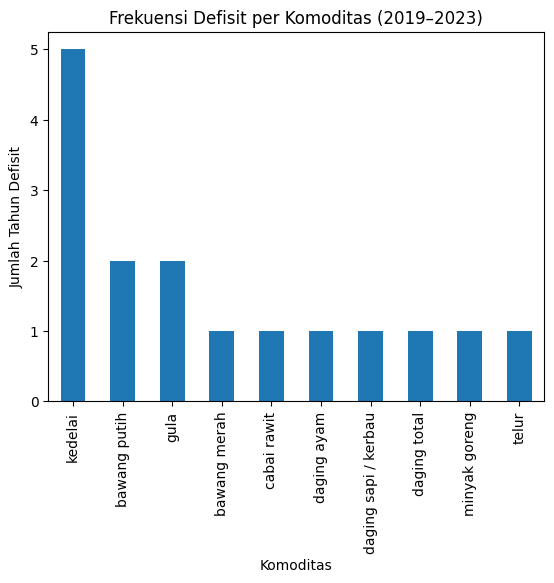

In [42]:
#VISUALISASI FREKUENSI DEFISIT PER KOMODITAS (2019–2023)
defisit_komoditas = (
    df_tahun[df_tahun['surplus_defisit'] < 0]
    .groupby('komoditas')
    .size()
    .sort_values(ascending=False)
)

defisit_komoditas.plot(kind='bar')
plt.title('Frekuensi Defisit per Komoditas (2019–2023)')
plt.xlabel('Komoditas')
plt.ylabel('Jumlah Tahun Defisit')
plt.show()


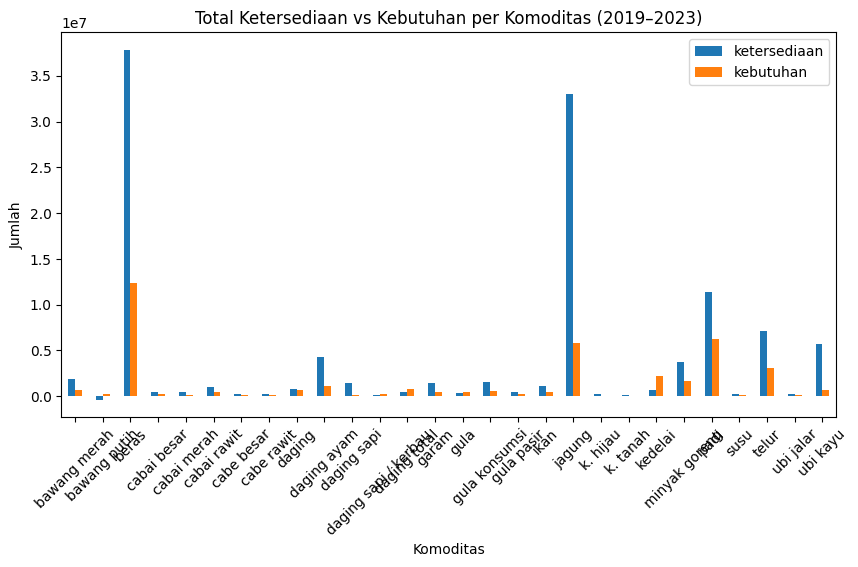

In [ ]:
#VISUALISASI KETERSEDIAAN DAN KEBUTUHAN PER KOMODITAS (2019–2023)
komoditas_summary = df_tahun.groupby('komoditas')[['ketersediaan','kebutuhan']].sum()

komoditas_summary.plot(kind='bar', figsize=(10,5))
plt.title('Total Ketersediaan vs Kebutuhan per Komoditas (2019–2023)')
plt.xlabel('Komoditas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()
